In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import display_html 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [2]:
def visualize(lr, X,Y):
    plt.scatter(X, Y, color="red")
    plt.plot(X, lr.predict(X), color="green") 
    plt.title("Salary vs Experience (Testing Set)")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary") 
    plt.show()

In [3]:
def linear(x_train, y_train): 
    lr = LinearRegression() 
    lr.fit(x_train, y_train)
    m=lr.coef_
    b=lr.intercept_
    print(" Learned parameter: \n slope=",m, " \nintercept=",b) 
    return lr

In [4]:
def test(lr, x_test,y_test):
    x_test = x_test.reset_index() 
    del x_test['index']
    y_test=y_test.reset_index()
    del y_test['index']
    y_pred = lr.predict(x_test)
    predictions = pd.concat([x_test,pd.Series(y_pred,name='Predicted salary')], axis=1)
    print("Do you want to view salary prediction of test data?") 
    choice=input()
    if choice=='yes':
        display_html(predictions)
    print("Do you want to view Evaluation of linear regression model?") 
    choice=input()
    if choice=='yes':
        evaluation(lr,y_pred,y_test)
    else:
        quit()

In [5]:
def evaluation(lr,y_pred,y_test):
    print('Mean Absolute Error of the Model:',metrics.mean_absolute_error(y_test,y_pred)) 
    print('Mean Squared Error of the Model: ',metrics.mean_squared_error(y_test,y_pred)) 
    print('Root Mean Squared Error of the Model:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Do you want to view the dataset?
yes


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43325.0
4,2.2,39381.0
5,2.0,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


 Learned parameter: 
 slope= [9526.21164911]  
intercept= 25563.58577411921
Do you want to view salary prediction of test data?
yes


,YearsExperience,Predicted salary
0,10.3,123683.565760
1,7.1,93199.688483
2,1.3,37947.660918
3,9.6,117015.217606
4,4.0,63668.432371
5,3.9,62715.811206
6,3.2,56047.463051
7,1.1,36042.418588
8,5.9,81768.234504
9,8.7,108441.627121


Do you want to view Evaluation of linear regression model?
yes
Mean Absolute Error of the Model: 3367.770697526128
Mean Squared Error of the Model:  19164284.89088298
Root Mean Squared Error of the Model: 58.03249690928461
Enter the year of experience to predict the salary of employee:
15


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Salary for a employee with 6 year of experience is: [168456.76051072]
Do your want to view the ploat for test set prediction?
yes
Plotting the y test data vs y predicted data


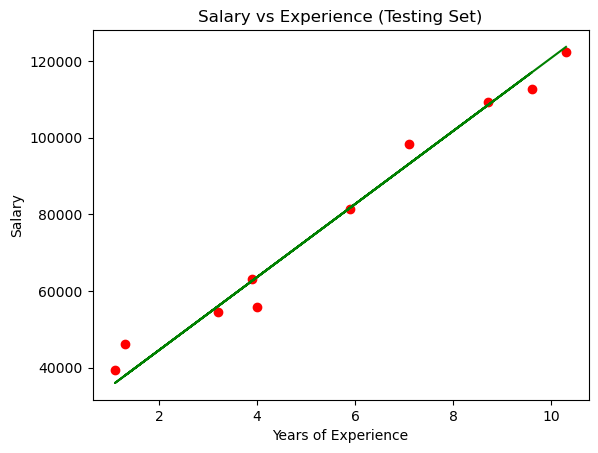

In [6]:
def main():
    dataset = dataset = pd.read_csv('encoded-Salary_Data.csv',header=0) 
    print("Do you want to view the dataset?") 
    choice=input()
    if choice=='yes':
        display_html(dataset)
    y = dataset['Salary']
    x = dataset.drop(['Salary'],axis=1)
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 1/3) 
    lr=linear(x_train,y_train)
    test(lr, x_test,y_test)
    print("Enter the year of experience to predict the salary of employee:") 
    year=int(input())
    print("Salary for a employee with 6 year of experience is:",lr.predict([[year]])) 
    print("Do your want to view the ploat for test set prediction?") 
    choice=input()
    if choice=='yes':
        print("Plotting the y test data vs y predicted data")
        visualize(lr, x_test,y_test)
    else:
        quit()
main()
